# Functions and numerical methods described in All of Statistics, by Larry Wasserman
## Author: Sam Eure

In [4]:
import numpy as np

In [18]:
def diag(v):
    """Returns the diagonal matrix from a vector"""
    D = np.zeros((len(v),len(v)))
    for i in range(len(v)):
        D[i,i] = v[i]
    return(D)

In [21]:
x = np.array([1,2,3,4,5,8])
diag(x)*diag(x)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 25.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 64.]])

## Covariance

In [30]:
def cov(a,b):
    """Calculates an unbiased estimate for the covariance of two vectors 
        of observed random variables. Vectors must have length ≥ 2 or else. """
    n = len(a)
    mA = np.mean(a)
    mB = np.mean(b)
    c = 0
    for i in range(n):
        c = c + (a[i]-mA)*(b[i]-mB)
    return(c/(n-1))
    
def cov_matrix(X):
    """Returns an unbiased estimate of the covariance matrix of a dataset X. 
        X must have rows of observations and columns of covariates/features."""
    k = len(X[0,:])
    S = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            S[i,j] = cov(X[:,i], X[:,j])
    return(S)
    

In [33]:
X = np.array([[64,580,29],[66,570,33],[68,590,37],[69,660,46],[73,600,55]])
cov_matrix(X)

array([[  11.5 ,   50.  ,   34.75],
       [  50.  , 1250.  ,  205.  ],
       [  34.75,  205.  ,  110.  ]])

# Orthogonal Function Basis Project

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def inner_product(f,g,a=0,b=1, n=10000):
    """Numerically estimates the inner product between two continuous functions.
        Inner product calculated over the interval a to b.
        This function's indented use is to assist with the inner products of probability density functions."""
    x = np.array(range(n))/n
    step = (b-a)/n
    fxgx = f(x)*g(x)
    return(np.sum(fxgx*step))

def identity(x):
    """A simply identity function which returns the input."""
    return(x)

def cosj(j=1):
    """Returns the j'th orthogonal cosine basis function."""
    if j==0:
        def c(x):
            return(1)
        return(c)
    else:
        def c(x,j=j):
            return(2**(.5)*np.cos(j*np.pi*x))
    return(c)

def doppler(x):
    """The doppler function."""
    return(((x*(1-x))**.5)*np.sin((2.1*np.pi)/(x+.05)))

def ortho_function_approx(f,x,basis = cosj, J=5, n = 10000):
    """Approximates the distribution of f using an orthogonal basis of 
        cosine functions."""
    approx = x * 0
    for j in range(J):
        bas_f = basis(j=j)
        Bj = inner_product(f,bas_f, n=n)
        approx = approx + Bj*bas_f(x)
    return(approx)

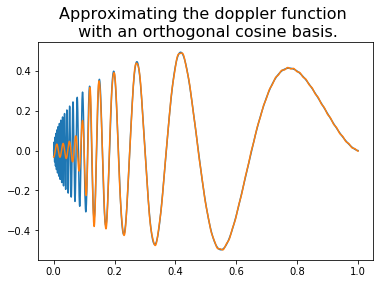

In [48]:
x = np.array(range(10000))/10000
dop_approx = ortho_function_approx(doppler,x,J=100)
plt.plot(x,doppler(x))
plt.plot(x,dop_approx)
plt.title("Approximating the doppler function \n with an orthogonal cosine basis.", size = 16);

### Importance Sampling

In [27]:
import scipy

In [2]:
def normal_pdf(x,m,v):
    "Calculates p(x) for a Normal(m,v) pdf."
    t = (x-m)/np.sqrt(v)
    return((1/((2*np.pi*v)**.5))*np.e**(-.5*t**2))

$$ f(x) \sim N(0,1) $$
$$ g(x) \sim N(4,1) $$
$$ \large \mathbb{P}_f(X>3) = \int \mathbb{I}[X > 3] f(x) dx = \int \frac{\mathbb{I}[X > 3]f(x)}{g(x)}g(x) dx = \mathbb{E}_g \Bigg[\mathbb{I}[X > 3]\frac{f(x)}{g(x)} \Bigg] $$

In [41]:
X = np.random.normal(4,1,10000)
I = X > 3
f = normal_pdf(X,0,1)
g = normal_pdf(X,4,1)
print("Importance sampling method:", round(np.mean(f*I/g),5))
print("Acutal soluction:", round(1 - scipy.stats.norm.cdf(3),5))

Importance sampling method: 0.00136
Acutal soluction: 0.00135
